In [1]:
# Importing all required libraries and classes
# For numpy and Pandas -Maths and Data 
import numpy as np
import pandas as pd

#For plotting Graphs
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# For statistical analysis
import statsmodels.api as sm

#For Data analysis
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



#pd.show_versions()

C:\Users\inpunabhr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Loading dataframe in CarPrice_df_raw
CarPrice_df_raw=pd.read_csv('CarPrice_Assignment.csv')
CarPrice_df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [3]:
CarPrice_df_raw.head() # taking some peek in dataframe

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Cleanup
1. Imputing Values where ever required
2. Creating dummy variables for categorical variables where ever required( will keep original columns for EDA)

In [4]:
#Cleaning up data
CarPrice_df_raw.isnull().any(axis=0) # No Column with NA or NaN or


car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [5]:

# As Car Name is combination of Manufacturer(Company Name) and Model of Car, We will break this information in 2 New Column
CarPrice_df_raw['manufacturer']=CarPrice_df_raw.CarName.apply(lambda x: x.split(" ")[0]) # Getting the Car Manufacturer Name
#Getting the Car Model Name
CarPrice_df_raw['modelname']=CarPrice_df_raw.CarName.apply(lambda x: " ".join(x.split(" ")[1:]))
# Getting the Car Manufacturer Name
CarPrice_df_raw.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
# From above unique values of manufacturer we can observe that the name of manufacturer is spelt wrong in some cases
# Correcting Name of the company
#'maxda'-> 'mazda'
CarPrice_df_raw[CarPrice_df_raw.manufacturer=='maxda']='mazda'
#'Nissan'-> 'nissan'
CarPrice_df_raw[CarPrice_df_raw.manufacturer=='Nissan']='nissan'
#'porcshce'->'porsche'
CarPrice_df_raw[CarPrice_df_raw.manufacturer=='porcshce']='porsche'
# 'toyouta'->'toyota'
CarPrice_df_raw[CarPrice_df_raw.manufacturer=='toyouta']='toyota'
#['vokswagen'or 'vw']-> 'volkswagen'
CarPrice_df_raw[(CarPrice_df_raw.manufacturer=='vokswagen') | (CarPrice_df_raw.manufacturer=='vw')]='volkswagen'


In [7]:
#Checking the manufacturer name corrected or not
CarPrice_df_raw.manufacturer.value_counts()## It is corrected now

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: manufacturer, dtype: int64

In [8]:
#Checking Car Model Column
CarPrice_df_raw.modelname.unique()# Seems ok

array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop', 'colt (sw)',
       'coronet custom', 'dart custom', 'coronet custom (sw)', 'civic',
       'civic cvcc', 'accord cvcc', 'accord lx', 'civic 1500 gl', 'accord',
       'civic 1300', 'prelude', 'civic (auto)', 'MU-X', 'D-Max ',
       'D-Max V-Cross', 'xj', 'xf', 'xk', 'mazda', 'rx2 coupe', 'rx-4',
       'glc deluxe', '626', 'glc', 'rx-7 gs', 'glc 4', 'glc custom l',
       'glc custom', 'electra 225 custom', 'century luxus (sw)', 'century',
       'skyhawk', 'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'nissan',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'clipper

In [9]:
# Creating Dummy Variables for manufacturer
dummy_manufacturer=pd.get_dummies(data=CarPrice_df_raw['manufacturer'])
dummy_manufacturer.head()
CarPrice_df_raw=pd.concat([CarPrice_df_raw,dummy_manufacturer],axis=1)
CarPrice_df_raw.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Checking FuelType Unique Values
CarPrice_df_raw.fueltype.value_counts()#This Column is messed up with name of manufactured in field of fuel type

gas           178
diesel         19
volkswagen      3
mazda           2
toyota          1
nissan          1
porsche         1
Name: fueltype, dtype: int64

In [11]:
# Imputing by Dropping rows where fueltype is other than gas or diesel as we dont have any means to know if it is gas or diesel
validfuellist=['gas','diesel']
CarPrice_df_raw=CarPrice_df_raw[CarPrice_df_raw.fueltype.isin(validfuellist)] 
#CarPrice_df_raw.fueltype.value_counts()


In [12]:
#Creating dummy Variable for fueltype categorical variable with gas as 1 and Diesel as 0
def fuelisgas(x):
    if x=='gas':
        return 1
    else:
        return 0 
CarPrice_df_raw['fueltype_gas']=[ fuelisgas(x) for x in CarPrice_df_raw.fueltype]
CarPrice_df_raw.fueltype_gas.value_counts()

1    178
0     19
Name: fueltype_gas, dtype: int64

In [13]:
CarPrice_df_raw.symboling.value_counts()# Correct Column No imputation is needed

 0    67
 1    51
 2    31
 3    24
-1    21
-2     3
Name: symboling, dtype: int64

## We can create Dummy variables by using get_dummies but I prefer to create it other way arround. below

In [14]:
#Creating dummy Variable for  categorical variable symboling
def symboling_is_0(x):
    if x==0:
        return 1
    else:
        return 0
def symboling_is_1(x):
    if x==1:
        return 1
    else:
        return 0
    
def symboling_is_2(x):
    if x==2:
        return 1
    else:
        return 0
    
def symboling_is_3(x):
    if x==3:
        return 1
    else:
        return 0

def symboling_is_neg1(x):
    if x==-1:
        return 1
    else:
        return 0
    
    

CarPrice_df_raw['symboling_is_0']=[symboling_is_0(x) for x in CarPrice_df_raw.symboling]
CarPrice_df_raw['symboling_is_1']=[symboling_is_1(x) for x in CarPrice_df_raw.symboling]
CarPrice_df_raw['symboling_is_2']=[symboling_is_2(x) for x in CarPrice_df_raw.symboling]
CarPrice_df_raw['symboling_is_3']=[symboling_is_3(x) for x in CarPrice_df_raw.symboling]
CarPrice_df_raw['symboling_is_neg1']=[symboling_is_neg1(x) for x in CarPrice_df_raw.symboling]


In [15]:
CarPrice_df_raw.aspiration.value_counts() # Correct Column No imputation is needed

std      160
turbo     37
Name: aspiration, dtype: int64

In [16]:
# Creating dummy columns for categorical variable aspiration
def aspiration_is_std(x):
    if x=='std':
        return 1
    else:
        return 0
CarPrice_df_raw['aspiration_is_std']=[aspiration_is_std(x) for x in CarPrice_df_raw.aspiration]
CarPrice_df_raw.aspiration_is_std.value_counts()

1    160
0     37
Name: aspiration_is_std, dtype: int64

In [17]:
CarPrice_df_raw.doornumber.value_counts() # Correct Column No imputation is needed

four    114
two      83
Name: doornumber, dtype: int64

In [18]:
# Creating dummy columns for categorical variable doornumber
def door_is_four(x):
    if x=='four':
        return 1
    else:
        return 0
CarPrice_df_raw['door_is_four']=[door_is_four(x) for x in CarPrice_df_raw.doornumber]
CarPrice_df_raw.door_is_four.value_counts()


1    114
0     83
Name: door_is_four, dtype: int64

In [19]:
CarPrice_df_raw.carbody.value_counts() # Correct Column No imputation is needed

sedan          94
hatchback      67
wagon          24
hardtop         7
convertible     5
Name: carbody, dtype: int64

In [20]:
# Creating dummy variables for carbody
def body_is_sedan(x):
    if x=='sedan':
        return 1
    else:
        return 0
    
def body_is_hatchback(x):
    if x=='hatchback':
        return 1
    else:
        return 0
    
def body_is_wagon(x):
    if x=='wagon':
        return 1
    else:
        return 0

def body_is_hardtop(x):
    if x=='hardtop':
        return 1
    else:
        return 0

CarPrice_df_raw['body_is_sedan']=[body_is_sedan(x) for x in CarPrice_df_raw.carbody]
CarPrice_df_raw['body_is_hatchback']=[body_is_hatchback(x) for x in CarPrice_df_raw.carbody]
CarPrice_df_raw['body_is_wagon']=[body_is_wagon(x) for x in CarPrice_df_raw.carbody]
CarPrice_df_raw['body_is_hardtop']=[body_is_hardtop(x) for x in CarPrice_df_raw.carbody]

In [21]:
CarPrice_df_raw.drivewheel.value_counts() # Correct Column No imputation is needed

fwd    114
rwd     74
4wd      9
Name: drivewheel, dtype: int64

In [22]:
#Creating dummy variables for Categorical Variable drivewheel
def drivewheel_is_fwd(x):
    if x=='fwd':
        return 1
    else:
        return 0
    
def drivewheel_is_rwd(x):
    if x=='rwd':
        return 1
    else:
        return 0
    
CarPrice_df_raw['drivewheel_is_fwd']=[drivewheel_is_fwd(x) for x in CarPrice_df_raw.drivewheel]
CarPrice_df_raw['drivewheel_is_rwd']=[drivewheel_is_rwd(x) for x in CarPrice_df_raw.drivewheel]
    

In [23]:
CarPrice_df_raw.enginelocation.value_counts() # Correct Column No imputation is needed

front    195
rear       2
Name: enginelocation, dtype: int64

In [24]:
#Creating dummy variables for Categorical Variable enginelocation
def enginelocation_is_front(x):
    if x=='front':
        return 1
    else:
        return 0
      
CarPrice_df_raw['enginelocation_is_front']=[enginelocation_is_front(x) for x in CarPrice_df_raw.enginelocation]

In [25]:
CarPrice_df_raw.enginetype.value_counts() # Correct Column No imputation is needed

ohc      142
ohcf      14
ohcv      13
l         12
dohc      11
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [26]:
#Creating dummy variables for Categorical Variable enginetype
def enginetype_is_ohc(x):
    if x=='ohc':
        return 1
    else:
        return 0

def enginetype_is_ohcf(x):
    if x=='ohcf':
        return 1
    else:
        return 0
def enginetype_is_ohcv(x):
    if x=='ohcv':
        return 1
    else:
        return 0 
def enginetype_is_l(x):
    if x=='l':
        return 1
    else:
        return 0    

def enginetype_is_dohc(x):
    if x=='dohc':
        return 1
    else:
        return 0 
def enginetype_is_rotor(x):
    if x=='rotor':
        return 1
    else:
        return 0     
    
CarPrice_df_raw['enginetype_is_ohc']=[enginetype_is_ohc(x) for x in CarPrice_df_raw.enginetype]
CarPrice_df_raw['enginetype_is_ohcf']=[enginetype_is_ohcf(x) for x in CarPrice_df_raw.enginetype]
CarPrice_df_raw['enginetype_is_ohcv']=[enginetype_is_ohcv(x) for x in CarPrice_df_raw.enginetype]
CarPrice_df_raw['enginetype_is_l']=[enginetype_is_l(x) for x in CarPrice_df_raw.enginetype]
CarPrice_df_raw['enginetype_is_rotor']=[enginetype_is_rotor(x) for x in CarPrice_df_raw.enginetype]


In [27]:
CarPrice_df_raw.cylindernumber.value_counts()# Correct Column No imputation is needed

four      153
six        22
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [28]:
#Creating dummy variables for Categorical Variable cylindernumber
def cylindernumber_is_four(x):
    if x=='four':
        return 1
    else:
        return 0
def cylindernumber_is_six(x):
    if x=='six':
        return 1
    else:
        return 0

def cylindernumber_is_five(x):
    if x=='five':
        return 1
    else:
        return 0

def cylindernumber_is_eight(x):
    if x=='eight':
        return 1
    else:
        return 0 
def cylindernumber_is_two(x):
    if x=='two':
        return 1
    else:
        return 0
def cylindernumber_is_three(x):
    if x=='three':
        return 1
    else:
        return 0    
    
CarPrice_df_raw['cylindernumber_is_four']=[cylindernumber_is_four(x) for x in CarPrice_df_raw.cylindernumber]
CarPrice_df_raw['cylindernumber_is_six']=[cylindernumber_is_six(x) for x in CarPrice_df_raw.cylindernumber]
CarPrice_df_raw['cylindernumber_is_five']=[cylindernumber_is_five(x) for x in CarPrice_df_raw.cylindernumber]
CarPrice_df_raw['cylindernumber_is_eight']=[cylindernumber_is_eight(x) for x in CarPrice_df_raw.cylindernumber]
CarPrice_df_raw['cylindernumber_is_two']=[cylindernumber_is_two(x) for x in CarPrice_df_raw.cylindernumber]
CarPrice_df_raw['cylindernumber_is_three']=[cylindernumber_is_three(x) for x in CarPrice_df_raw.cylindernumber]


In [29]:
CarPrice_df_raw.fuelsystem.value_counts() # Correct Column No imputation is needed

mpfi    90
2bbl    63
idi     19
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [30]:
#Creating dummy variables for Categorical Variable fuelsystem
def fuelsystem_is_mpfi(x):
    if x=='mpfi':
        return 1
    else:
        return 0
def fuelsystem_is_2bbl(x):
    if x=='2bbl':
        return 1
    else:
        return 0
    
def fuelsystem_is_idi(x):
    if x=='idi':
        return 1
    else:
        return 0 
def fuelsystem_is_1bbl(x):
    if x=='1bbl':
        return 1
    else:
        return 0
    
def fuelsystem_is_spdi(x):
    if x=='spdi':
        return 1
    else:
        return 0     
    
CarPrice_df_raw['fuelsystem_is_mpfi']=[fuelsystem_is_mpfi(x) for x in CarPrice_df_raw.fuelsystem]
CarPrice_df_raw['fuelsystem_is_2bbl']=[fuelsystem_is_2bbl(x) for x in CarPrice_df_raw.fuelsystem]
CarPrice_df_raw['fuelsystem_is_idi']=[fuelsystem_is_idi(x) for x in CarPrice_df_raw.fuelsystem]
CarPrice_df_raw['fuelsystem_is_1bbl']=[fuelsystem_is_1bbl(x) for x in CarPrice_df_raw.fuelsystem]
CarPrice_df_raw['fuelsystem_is_spdi']=[fuelsystem_is_spdi(x) for x in CarPrice_df_raw.fuelsystem]

## Creating Dataframes from raw dataframe for further analysis
### Assumption: 
We know that thr brand(manufacturer+ Car Model) have significant impact on pricing but for now we will try to investigate the impact of features of car on its pricing.
We will try to revisit the impact of brand on pricing later.


In [31]:
# Creating dataframe for further analysis by dropping columns from CarPrice_df_raw as we converted them to dummy variables

dropcolumnname=['car_ID','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',\
                'enginetype','cylindernumber','fuelsystem']
carprice_df_ml=CarPrice_df_raw.drop(columns=dropcolumnname,axis=1)

carprice_df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 69 columns):
wheelbase                  197 non-null object
carlength                  197 non-null object
carwidth                   197 non-null object
carheight                  197 non-null object
curbweight                 197 non-null object
enginesize                 197 non-null object
boreratio                  197 non-null object
stroke                     197 non-null object
compressionratio           197 non-null object
horsepower                 197 non-null object
peakrpm                    197 non-null object
citympg                    197 non-null object
highwaympg                 197 non-null object
price                      197 non-null object
manufacturer               197 non-null object
modelname                  197 non-null object
alfa-romero                197 non-null uint8
audi                       197 non-null uint8
bmw                        197 non-null uint8
buick

In [32]:
# Dropping manufacturer and modelname as we created dummies
df_stats=carprice_df_ml.drop(columns=['manufacturer','modelname'])

In [33]:
# Converting all column object to numeric value
cols=df_stats.columns
df_stats[cols]=df_stats[cols].apply(pd.to_numeric, errors='coerce')



In [34]:
# Normalize the Data
df_stats=(df_stats-df_stats.min())/(df_stats.max()-df_stats.min())
df_stats.head()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_is_six,cylindernumber_is_five,cylindernumber_is_eight,cylindernumber_is_two,cylindernumber_is_three,fuelsystem_is_mpfi,fuelsystem_is_2bbl,fuelsystem_is_idi,fuelsystem_is_1bbl,fuelsystem_is_spdi
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Checking for outliers



count    197.000000
mean       0.204026
std        0.197623
min        0.000000
10%        0.039075
20%        0.058393
30%        0.075587
40%        0.100099
50%        0.129760
60%        0.188471
70%        0.258329
80%        0.310491
90%        0.432302
95%        0.682379
99%        0.890130
100%       1.000000
max        1.000000
Name: price, dtype: float64


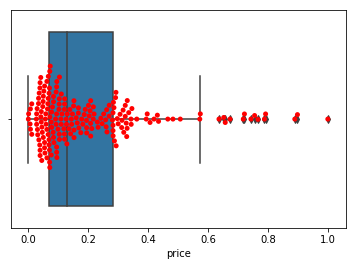

In [35]:
print(df_stats.price.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1]))
sns.boxplot(df_stats.price)
sns.swarmplot(df_stats.price,color='r')

### From above price box plot we can see
1.Beyond 95 percentile there are lots of outlier

2. We need to drop those outliers from our data
3. We need to do Regression Analysis with and Without Outliers and choose appropriate Models


count    197.000000
mean       0.204026
std        0.197623
min        0.000000
10%        0.039075
20%        0.058393
30%        0.075587
40%        0.100099
50%        0.129760
60%        0.188471
70%        0.258329
80%        0.310491
90%        0.432302
95%        0.682379
100%       1.000000
max        1.000000
Name: price, dtype: float64


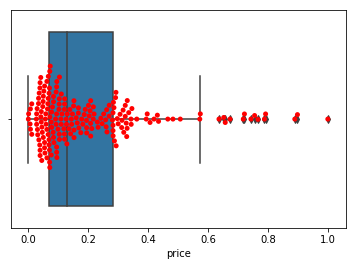

In [36]:
# Dropping the values beyond 30000 as visible in box plot above
df_stats_without_outlier=df_stats[df_stats.price<30000]

print(df_stats_without_outlier.price.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1]))
sns.boxplot(df_stats_without_outlier.price)
sns.swarmplot(df_stats_without_outlier.price,color='r')
#We will use df_stats_without_outlier for regression analysis later

## Regression Analysis with Price Outliers Present


### Conclusion
Based on above data df_stats we have created 45 columns that is required for further analysis
We will find Variable Inflation factor in this data and select appropriate Variables in next few analysis
We will use multiple approach to minimise the Features or Columns
and will use following
VIF and RFE Methods

In [37]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)


In [38]:
vif_df=vif_cal(input_data=df_stats,dependent_col="price")
vif_df=vif_df.reset_index().drop(columns='index',axis=1)
vif_df


C:\Users\inpunabhr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,volkswagen,inf
1,porsche,inf
2,jaguar,inf
3,mazda,inf
4,mercury,inf
5,enginelocation_is_front,inf
6,nissan,inf
7,peugeot,inf
8,plymouth,inf
9,renault,inf


In [39]:
# Eliminating the Causes of VIF=inf for better clarity and recalculating VIF
cols=vif_df.loc[vif_df.Vif==np.inf,'Var']

df_stats=df_stats.drop(columns=cols,axis=1)

vif_df=vif_cal(input_data=df_stats,dependent_col="price")
vif_df=vif_df.reset_index().drop(columns='index',axis=1)
vif_df

,Var,Vif
0,highwaympg,209.74
1,citympg,156.72
2,curbweight,134.16
3,carlength,118.16
4,carwidth,80.04
5,wheelbase,74.71
6,enginesize,64.31
7,cylindernumber_is_four,53.19
8,horsepower,52.96
9,boreratio,36.20


## Identiifying appropriate Features from df_stats using RFE

In [40]:
#plitting Data in Training and Test
X=df_stats.drop(columns="price",axis=1)
y=df_stats['price']
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85,test_size = 0.15,random_state=100)


In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  


[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True False  True  True  True  True  True  True False False False  True]
[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 4 1 1 1 1 1 1 3 7 5 1]


In [42]:
col = X_train.columns[rfe.support_]

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [46]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     53.95
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           2.18e-61
Time:                        15:29:37   Log-Likelihood:                 248.83
No. Observations:                 167   AIC:                            -435.7
Df Residuals:                     136   BIC:                            -339.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

R squared and adjusted R Squared are pretty good as it is > 0.9

### Now let us select parameters for Model Creation and analyse them one by one
I have Selected Parameter based on RFE and VIF Tables to build Multiple Models for further analysis
fueltype_gas,cylindernumber_is_four,enginesize,curbweight,carwidth,stroke,horsepower,cylindernumber_is_eight,symboling_is_1,highwaympg, enginetype_is_rotor,highwaympg etc... are few for further analysis

We will create Correlation Clustermap to check the correlation between the variables, This will also help us in identifying proper Features for further analysis.

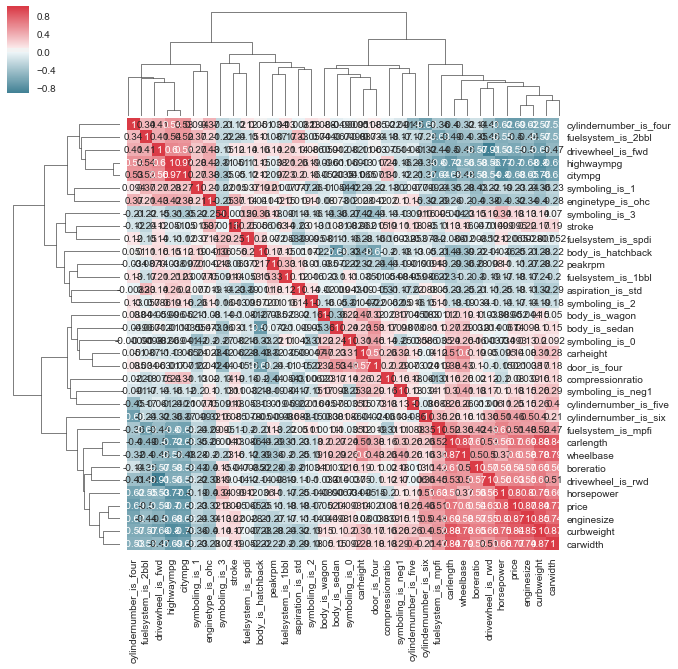

In [47]:
cols=['price','highwaympg','citympg','curbweight','carlength','carwidth','wheelbase','enginesize','cylindernumber_is_four',\
      'horsepower','boreratio','body_is_sedan','fuelsystem_is_mpfi','stroke','carheight','drivewheel_is_fwd','fuelsystem_is_2bbl',\
      'body_is_hatchback','symboling_is_0','symboling_is_1','aspiration_is_std','drivewheel_is_rwd','peakrpm','compressionratio',\
      'enginetype_is_ohc','body_is_wagon','symboling_is_2','symboling_is_3','door_is_four','cylindernumber_is_six',\
      'symboling_is_neg1','cylindernumber_is_five','fuelsystem_is_1bbl','fuelsystem_is_spdi']

corr2=df_stats[cols].corr()
sns.set(font_scale=1)
pt=sns.clustermap(corr2,mask=np.zeros_like(corr2, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
          square=True,annot=True,annot_kws={"size": 10})

# Correlation Cluster Map below is messed up so we will filter it in upcoming code block

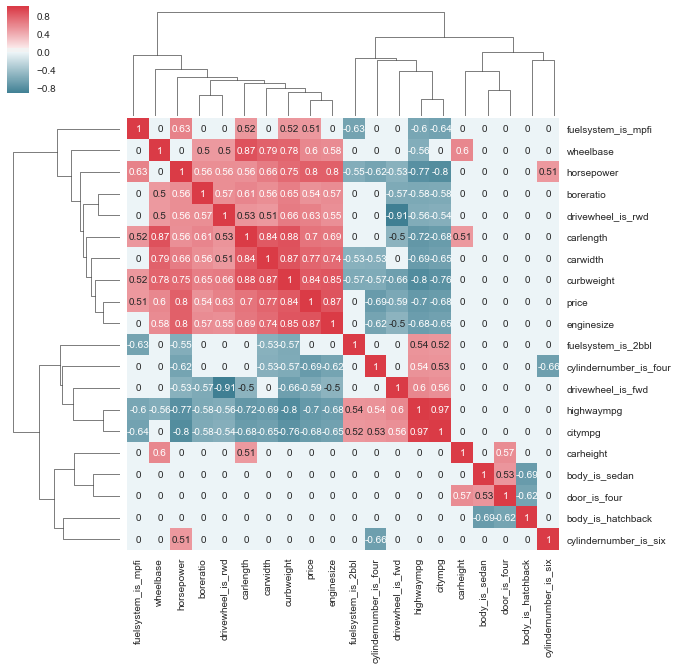

In [48]:
# Filtering the Correlation Map with Correlation Value |corr|>0.5
corr2
#creating list of all columns
filtercolumns=[corr2.columns]
def filtercorrval(x):
        if (x>0.5):
            return x
        elif (x<-0.5):
            return (x)
corr3=corr2.applymap(lambda x:filtercorrval(x))
# Drop all columns which have NaN values
corr3.dropna(axis=1,how='all')
corr3.dropna(axis=0,how='all')
corr3.isna().sum()<35
corr3=corr3[corr3.isna().sum()<33]

corr3.dropna(axis=1,inplace=True,thresh=1)
corr3.fillna(0,inplace=True)

sns.set(font_scale=1)
pt=sns.clustermap(corr3,mask=np.zeros_like(corr3, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
          square=True,annot=True,annot_kws={"size": 10})
## Interset Rate Vs Term and Interest Rate Vs Revol_util are highly correlated 


### Creating Various Model of Linear regression.

### Model 1- 'horsepower' as feature

In [49]:
# Putting feature variable to X
X = X_train[['horsepower']]#'enginesize','curbweight','carwidth'

# Putting response variable to y
y = y_train

In [50]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm1 = LinearRegression()

In [51]:
# fit the model to the training data
lm1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     276.7
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           4.11e-37
Time:                        15:29:42   Log-Likelihood:                 117.52
No. Observations:                 167   AIC:                            -231.0
Df Residuals:                     165   BIC:                            -224.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0198      0.016     -1.214      0.2

### Model 2- Adding 'enginesize' feature with 'horsepower' as feature
We need to compare Rsquare and adjusted RSquare Value between Model1 & Model 2

In [53]:
# Putting feature variable to X
X = X_train[['horsepower','enginesize']]

# Putting response variable to y
y = y_train

In [54]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm2 = LinearRegression()

In [55]:
# fit the model to the training data
lm2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     304.9
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           5.62e-56
Time:                        15:29:42   Log-Likelihood:                 164.85
No. Observations:                 167   AIC:                            -323.7
Df Residuals:                     164   BIC:                            -314.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0741      0.013     -5.590      0.0

### The value of R-squared and Adjusted R-squared have improved significantly( from 0.626->0.788) by addition of feature enginesize from Model 1 to Model2

### Model 3- Adding 'carwidth' feature to Model 1

In [57]:
# Putting feature variable to X
X = X_train[['carwidth','horsepower','enginesize']]

# Putting response variable to y
y = y_train

In [58]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm3=LinearRegression()

In [59]:
# fit the model to the training data
lm2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     257.3
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           1.41e-61
Time:                        15:29:42   Log-Likelihood:                 181.14
No. Observations:                 167   AIC:                            -354.3
Df Residuals:                     163   BIC:                            -341.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1544      0.018     -8.513      0.0

### The value of R-squared and Adjusted R-squared have improved significantly( from 0.788->0.81/0.82) by addition of feature enginesize from Model 2 to Model 3

### Model 4- Adding  'cylindernumber_is_four'   to Model 3

In [61]:
# Putting feature variable to X

X = X_train[['cylindernumber_is_four','carwidth','horsepower','enginesize']]
# Putting response variable to y
y = y_train

In [62]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm4=LinearRegression()

In [63]:
# fit the model to the training data
lm4.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           1.57e-64
Time:                        15:29:42   Log-Likelihood:                 191.12
No. Observations:                 167   AIC:                            -372.2
Df Residuals:                     162   BIC:                            -356.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

### The value of R-squared and Adjusted R-squared have improved significantly( from 0.82->0.845) by addition of feature cyllinder_number_is_four from Model 3 to Model 4

### Model 5- Adding  highwaympg  to Model 5

In [65]:
# Putting feature variable to X

X = X_train[['cylindernumber_is_four','carwidth','curbweight','horsepower','enginesize','highwaympg']]
# Putting response variable to y
y = y_train
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm5=LinearRegression()
# fit the model to the training data
lm5.fit(X,y)
X = sm.add_constant(X)
# create a fitted model in one line
lm_5 = sm.OLS(y,X).fit()
print(lm_5.summary())
# Since p value of highwaympg is high (0.510) and if we drop this mode then this become model 4,
# Thats why we will not make prediction with this model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     148.9
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           8.08e-63
Time:                        15:29:42   Log-Likelihood:                 192.65
No. Observations:                 167   AIC:                            -371.3
Df Residuals:                     160   BIC:                            -349.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

### The value of R-squared and Adjusted R-squared have improved significantly( from 0.81/0.82->0.86/0.85) by addition of feature enginesize from Model 4 to Model 5 but p value for highwaympg is >0.04 so we will reject this model

## Model 6 - By Eliminating one Feature at a time till we get optimal Value
Steps to do this:
We have performed iterations below manually to select appropriate features

Step1: Create a column list 'col' which contains all the features obtained from RFE calculated in previous step above.

Step2: Remove the feature from 'col' one at a time and Calculate the summary

Step3: Observe r-squared, r-squared adjusted and p value of feature.

Step4: if r-square or r-square adjusted value drops then stop and exit with list of appropriate features else continue

Step5: Remove the Feature if it p value is high and VIF value is low

Step6: Goto Step 2 till optimum solution is reached

In Below code block I have not created multiple models,instead I have removed feature from 'col' and recalculated the summary and keep on observing and eliminating features till I am sure that solution is optimum

In [66]:
# Putting feature variable to X ( Found from RFE evaluation)
#col_optimum=['carwidth','curbweight','enginesize','stroke','compressionratio','horsepower','peakrpm',\
#     'highwaympg','enginetype_is_ohc','enginetype_is_ohcv',\
#     'cylindernumber_is_four','cylindernumber_is_five','cylindernumber_is_eight']
 #
col_optimum=['carwidth','curbweight','enginesize','horsepower','stroke',\
             'enginetype_is_ohc',\
               'symboling_is_3','body_is_hatchback',\
            'carlength','fuelsystem_is_spdi']
removed_from_col=['enginetype_is_ohcv','highwaympg']

#X = X_train[['cylindernumber_is_four','carlength','carwidth','curbweight','horsepower','enginesize']]
X = X_train[col_optimum]
# Putting response variable to y
y = y_train

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm6=LinearRegression()

# fit the model to the training data
lm6.fit(X,y)

X = sm.add_constant(X)
# create a fitted model in one line
lm_6 = sm.OLS(y,X).fit()
print(lm_6.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     90.33
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           1.21e-59
Time:                        15:29:42   Log-Likelihood:                 195.25
No. Observations:                 167   AIC:                            -368.5
Df Residuals:                     156   BIC:                            -334.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1028      0

## Before making prediction we will create a Dataframe to capture conclusions as result

In [67]:
conclusion_df=pd.DataFrame(columns=['ModelName','R_Sqaure_Value','Mean_Squared_Error','Features'])

## Making Predictions using LM6

In [68]:
# Now let's use our model to make predictions.
col=col_optimum # computed above
X_test_lm6 = X_test[col]


# Adding a constant variable 
X_test_lm6 = sm.add_constant(X_test_lm6)
#X_test
# Making predictions
y_pred = lm_6.predict(X_test_lm6)


In [69]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


In [70]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00740347043926
r_square_value : 0.821907861343


Text(0,0.5,'price')

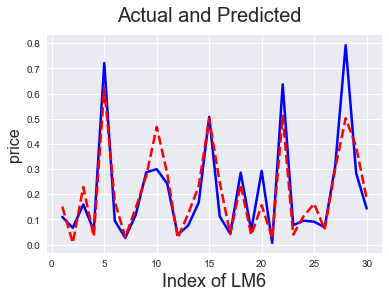

In [71]:
#Actual vs Predicted
c = [i for i in range(1,(y_test.count()+1),1)]
fig_lm6 = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")#Actual Plot in blue
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="--")#Predicted Plot in red
fig_lm6.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index of LM6', fontsize=18)                               # X-label
plt.ylabel('price', fontsize=16)   

Text(0,0.5,'Actual Price-Predicted Price')

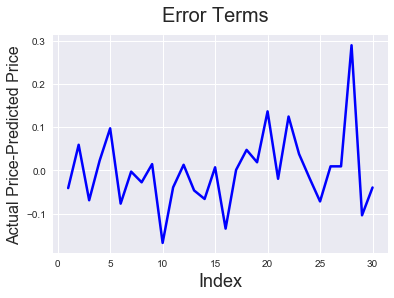

In [72]:
# Error terms
c = [i for i in range(1,(y_test.count()+1),1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual Price-Predicted Price', fontsize=16)                # Y-label

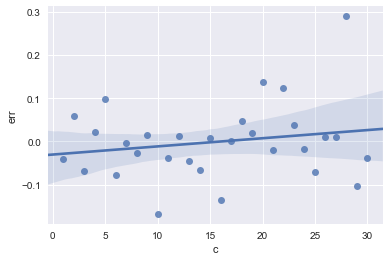

In [73]:
# Plotting the scatter-regression plot for errors
X_test_lm6['c'] = [i for i in range(1,(y_test.count()+1),1)]
X_test_lm6['err']=y_test-y_pred
sns.regplot(x='c',y='err',data=X_test_lm6)
# This Data image below shows white noice is present and error is not following any pattern

In [74]:
#Adding Results
index_col=['ModelName','R_Sqaure_Value','Mean_Squared_Error','Features']
col_count=1
row_series=pd.Series(['LM6',r_squared,mse,col],index=index_col)
conclusion_df.loc[col_count]=row_series
col_count=col_count+1
#conclusion_df=conclusion_df.append(s1,ignore_index=False)

## Making Predictions using LM4

In [75]:
# Now let's use our model to make predictions.
col=['cylindernumber_is_four','carwidth','horsepower','enginesize']
X_test_lm4 = X_test[col]


# Adding a constant variable 
X_test_lm4 = sm.add_constant(X_test_lm4)
#X_test
# Making predictions
y_pred = lm_4.predict(X_test_lm4)


In [76]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


In [77]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00928919164176
r_square_value : 0.776546415705


Text(0,0.5,'price')

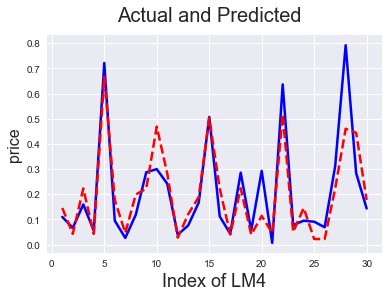

In [78]:
#Actual vs Predicted
c = [i for i in range(1,(y_test.count()+1),1)]
fig_lm4 = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")#Actual Plot in blue
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="--")#Predicted Plot in blue
fig_lm4.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index of LM4', fontsize=18)                               # X-label
plt.ylabel('price', fontsize=16)                               # Y-label


Text(0,0.5,'Actual Price-Predicted Price')

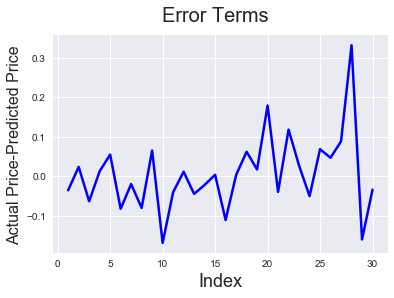

In [79]:
# Error terms
c = [i for i in range(1,(y_test.count()+1),1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual Price-Predicted Price', fontsize=16)                # Y-label

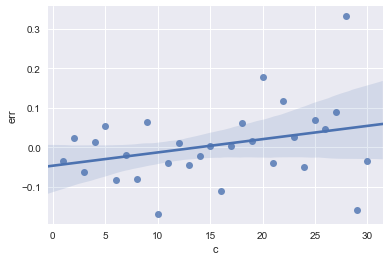

In [80]:
# Plotting the scatter-regression plot for errors
X_test_lm4['c'] = [i for i in range(1,(y_test.count()+1),1)]
X_test_lm4['err']=y_test-y_pred
sns.regplot(x='c',y='err',data=X_test_lm4)
# This Data image below shows white noice is present and error is not following any pattern

In [81]:
#Adding Results
#['ModelName','R_Sqaure_Value','Mean_Squared_Error','Features'])
row_series=pd.Series(['LM4',r_squared,mse,col],index=index_col)
conclusion_df.loc[col_count]=row_series
col_count=col_count+1

## Making predictions using model lm3

In [82]:
# Now let's use our model to make predictions.
col=['carwidth','horsepower','enginesize']
X_test_lm3 = X_test[col]

# Adding a constant variable 
X_test_lm3 = sm.add_constant(X_test_lm3)
#X_test
# Making predictions
y_pred = lm_3.predict(X_test_lm3)


In [83]:


mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


In [84]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0100149458554
r_square_value : 0.759088235639


Text(0,0.5,'price')

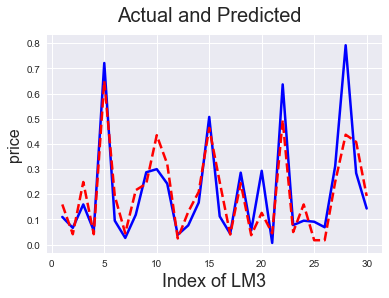

In [85]:
#Actual vs Predicted
c = [i for i in range(1,(y_test.count()+1),1)]
fig_lm3 = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")#Actual in Blue
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="--")# Predicted in Red
fig_lm3.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index of LM3', fontsize=18)                               # X-label
plt.ylabel('price', fontsize=16)                               # Y-label

Text(0,0.5,'Actual Price-Predicted Price')

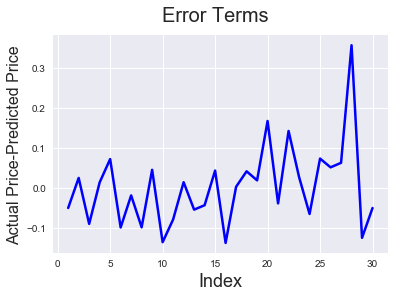

In [86]:
# Error terms
c = [i for i in range(1,(y_test.count()+1),1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual Price-Predicted Price', fontsize=16)                # Y-label

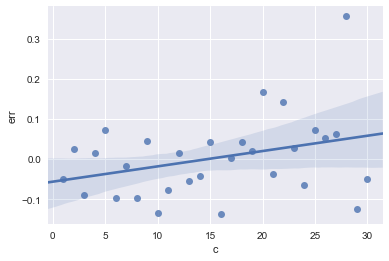

In [87]:
# Plotting the scatter-regression plot for errors
X_test['c'] = [i for i in range(1,(y_test.count()+1),1)]
X_test['err']=y_test-y_pred
sns.regplot(x='c',y='err',data=X_test)
# This Data image below shows white noice is present and error is not following and pattern


In [88]:
#Adding Results
#['ModelName','R_Sqaure_Value','Mean_Squared_Error','Features'])
row_series=pd.Series(['LM3',r_squared,mse,col],index=index_col)
conclusion_df.loc[col_count]=row_series
col_count=col_count+1

## Regression Analysis with Price outlier Removed

In [89]:
# Calculatingn VIF Index
vif_df=vif_cal(input_data=df_stats_without_outlier,dependent_col="price")
vif_df=vif_df.reset_index().drop(columns='index',axis=1)
vif_df[(vif_df.Vif>4)]


C:\Users\inpunabhr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,volkswagen,inf
1,porsche,inf
2,jaguar,inf
3,mazda,inf
4,mercury,inf
5,enginelocation_is_front,inf
6,nissan,inf
7,peugeot,inf
8,plymouth,inf
9,renault,inf


In [90]:
#Dropping the column wirh Manufacturer and recalculating the VIF
# Getting the COlumns where Vif= inf ( This value is coming inf because of categorical feature when we created dummy variables)

cols=vif_df.loc[vif_df.Vif==np.inf,'Var']
df_stats_without_outlier=df_stats_without_outlier.drop(columns=cols,axis=1)
vif_df=vif_cal(input_data=df_stats_without_outlier,dependent_col="price")
vif_df=vif_df.reset_index().drop(columns='index',axis=1)
vif_df[(vif_df.Vif>4)]

,Var,Vif
0,highwaympg,209.74
1,citympg,156.72
2,curbweight,134.16
3,carlength,118.16
4,carwidth,80.04
5,wheelbase,74.71
6,enginesize,64.31
7,cylindernumber_is_four,53.19
8,horsepower,52.96
9,boreratio,36.20


## Identiifying appropriate Features from df_stats_without_outlier using RFE

In [91]:
#random_state is the seed used by the random number generator, it can be any integer.
X=df_stats_without_outlier.drop(columns="price",axis=1)
y=df_stats_without_outlier['price']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [92]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  


[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False False  True  True  True False  True  True  True  True False  True]
[1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 7 4 1 1 1 6 1 1 1 1 2 1]


In [93]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     53.96
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           2.55e-51
Time:                        15:29:44   Log-Likelihood:                 216.52
No. Observations:                 137   AIC:                            -371.0
Df Residuals:                     106   BIC:                            -280.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Model 1(Without Price Outliers) lm_wpo - By Eliminating one Feature at a time till we get optimal Value
Steps to do this:
We have performed iterations below manually to select appropriate features

Step1: Create a column list 'col' which contains all the features obtained from RFE calculated in previous step above.

Step2: Remove the feature from 'col' one at a time and Calculate the summary

Step3: Observe r-squared, r-squared adjusted and p value of feature.

Step4: if r-square or r-square adjusted value drops then stop and exit with list of appropriate features else continue

Step5: Remove the Feature if it p value is high and VIF value is low

Step6: Goto Step 2 till optimum solution is reached

In Below code block I have not created multiple models,instead I have removed feature from 'col' and recalculated the summary and keep on observing and eliminating features till I am sure that solution is optimum

In [94]:
# Putting feature variable to X ( Found from RFE evaluation)
col_optimum= ['carwidth','enginesize','boreratio','stroke',\
             'horsepower',\
             'drivewheel_is_rwd','enginetype_is_ohcv',\
             ]

#Below is the Column in which we have added features after removing them one at a time from column col_optimum one at time
removed_from_col=['enginetype_is_ohc','compressionratio','citympg','wheelbase','symboling_is_0','symboling_is_neg1','peakrpm','fuelsystem_is_1bbl','body_is_sedan',\
                  'body_is_hardtop','body_is_wagon','aspiration_is_std','drivewheel_is_fwd','fuelsystem_is_mpfi','carheight'\
                 ,'symboling_is_1','symboling_is_2','fuelsystem_is_2bbl','body_is_hatchback','carlength','curbweight','fuelsystem_is_spdi']

#X = X_train[['cylindernumber_is_four','carlength','carwidth','curbweight','horsepower','enginesize']]
X = X_train[col_optimum]
# Putting response variable to y
y = y_train

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm_wpo=LinearRegression()

# fit the model to the training data
lm5.fit(X,y)

X = sm.add_constant(X)
# create a fitted model in one line
lm_wpo = sm.OLS(y,X).fit()
print(lm_wpo.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           1.34e-53
Time:                        15:29:44   Log-Likelihood:                 164.23
No. Observations:                 137   AIC:                            -312.5
Df Residuals:                     129   BIC:                            -289.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0523      0

 ## Making predictions using Model 1(Without Price Outliers) LM_WPO

In [95]:
# Now let's use our model to make predictions.

col=col_optimum # computed above
X_test_lm = X_test[col]


# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_lm)
#X_test
# Making predictions
y_pred = lm_wpo.predict(X_test_lm)


In [96]:

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


Mean_Squared_Error : 0.00656466562077
r_square_value : 0.814253416053


Text(0,0.5,'price')

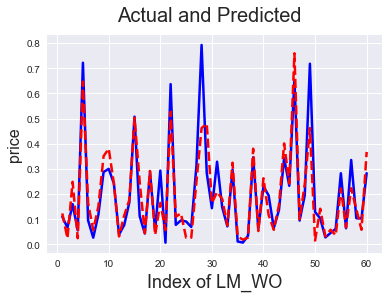

In [97]:

#Actual vs Predicted
c = [i for i in range(1,(y_test.count()+1),1)]
fig_lm_wo = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")#Actual Plot in blue
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="--")#Predicted Plot in red
fig_lm_wo.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index of LM_WO', fontsize=18)                               # X-label
plt.ylabel('price', fontsize=16)   



Text(0,0.5,'Actual Price-Predicted Price')

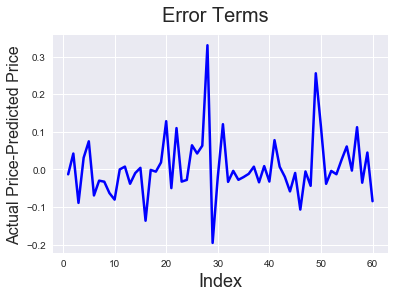

In [98]:
# Error terms
c = [i for i in range(1,(y_test.count()+1),1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual Price-Predicted Price', fontsize=16)                # Y-label


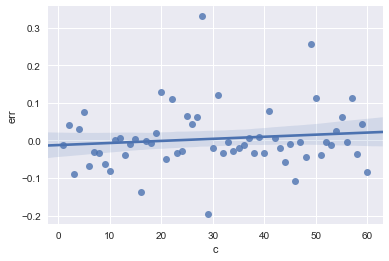

In [99]:

# Plotting the scatter-regression plot for errors
X_test['c'] = [i for i in range(1,(y_test.count()+1),1)]
X_test['err']=y_test-y_pred
tp=sns.regplot(x='c',y='err',data=X_test)
# This Data image below shows white noice is present and error is not following any pattern

In [100]:
#Adding Results
row_series=pd.Series(['LM_WPO',r_squared,mse,col],index=index_col)
conclusion_df.loc[col_count]=row_series


# Conclusion Summary

In [101]:
# Corresponding Features or Prising factors(listed in Feature column) are listed against the linear regression model-
#-displayed below  


conclusion_df

,ModelName,R_Sqaure_Value,Mean_Squared_Error,Features
1,LM6,0.821908,0.007403,"[carwidth, curbweight, enginesize, horsepower,..."
2,LM4,0.776546,0.009289,"[cylindernumber_is_four, carwidth, horsepower,..."
3,LM3,0.759088,0.010015,"[carwidth, horsepower, enginesize]"
4,LM_WPO,0.814253,0.006565,"[carwidth, enginesize, boreratio, stroke, hors..."


# Plotiing All Plots of Actual (in Blue) Vs Predicted (in Red) Price plot

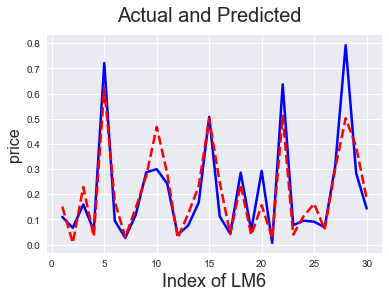

In [102]:
# Model LM6
fig_lm6

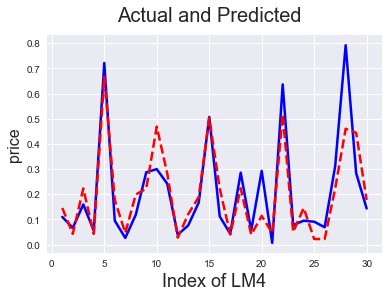

In [103]:
# Model LM4
fig_lm4

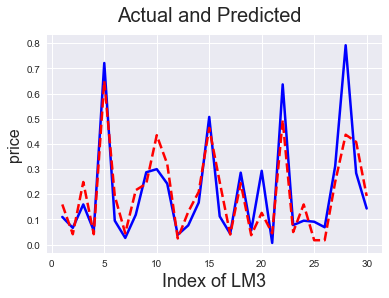

In [104]:
#Model LM3
fig_lm3

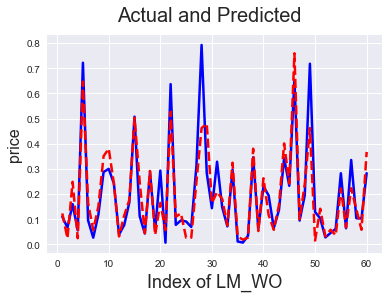

In [105]:
#Model LM_WO  Model without price outliers
fig_lm_wo

In [106]:
#Based on the details mentioned above  we can colcude that LM6 is the Right Model with highest r_squared value and low mse
conclusion_df[conclusion_df.ModelName=='LM6']

,ModelName,R_Sqaure_Value,Mean_Squared_Error,Features
1,LM6,0.821908,0.007403,"[carwidth, curbweight, enginesize, horsepower,..."


In [107]:
#Corresponding Pricing influencer or factors based on modeling of LM6
feat=conclusion_df[conclusion_df.ModelName=='LM6']['Features']
for ft in feat:
    print(ft)

['carwidth', 'curbweight', 'enginesize', 'horsepower', 'stroke', 'enginetype_is_ohc', 'symboling_is_3', 'body_is_hatchback', 'carlength', 'fuelsystem_is_spdi']
